In [81]:
#set up package and library for support task
import pandas as pd
import numpy as np
from sklearn import preprocessing  
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split

In [82]:
#read data from local and organize them by date

df = pd.read_csv('nba_games.csv', index_col=0)
df = df.sort_values("date")
df = df.reset_index(drop=True)

In [83]:
df

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,...,69.4,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False
1,240.0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,...,53.2,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False
2,240.0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,...,30.4,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True
3,240.0,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,...,37.5,38.9,201.0,120.0,NOP,95,0,2016,2015-10-27,True
4,240.0,240.0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,...,33.3,23.6,132.0,104.0,DET,106,0,2016,2015-10-27,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,240.0,240.0,34.0,85.0,0.400,15.0,38.0,0.395,14.0,19.0,...,42.9,36.3,133.0,112.0,GSW,107,0,2022,2022-06-10,False
17768,240.0,240.0,41.0,88.0,0.466,9.0,40.0,0.225,13.0,15.0,...,45.0,94.4,300.0,112.0,BOS,94,0,2022,2022-06-13,True
17769,240.0,240.0,31.0,75.0,0.413,11.0,32.0,0.344,21.0,31.0,...,33.3,36.2,222.0,107.0,GSW,104,1,2022,2022-06-13,False
17770,240.0,240.0,34.0,80.0,0.425,11.0,28.0,0.393,11.0,12.0,...,33.3,31.5,186.0,111.0,GSW,103,0,2022,2022-06-16,False


In [84]:
df.isnull().sum()

mp           0
mp.1         0
fg           0
fga          0
fg%          0
            ..
total_opp    0
home_opp     0
season       0
date         0
won          0
Length: 150, dtype: int64

In [85]:
#change won description into numeric
label_encoder = preprocessing.LabelEncoder()
df['won']= label_encoder.fit_transform(df['won'])

In [86]:
#delete dumb column that affected processing model
df.drop(["season","date","mp.1","mp_opp.1","index_opp","team","team_opp"],
        axis =1,
        inplace = True)

In [87]:
#divide variable columns with target columns ('won')
var_colums = [c for c in df.columns if c not in ['won']]
#separate X into variable without target column
X = df.loc[:, var_colums]
#assign target column to y
y = df.loc[:, 'won']

#make data train, and validation
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'won', 
                                                    train_size=0.8, valid_size=0.1, test_size=0.1,
                                                    random_state=123)
X_train.shape, X_valid.shape,X_test.shape, y_train.shape, y_valid.shape, y_test.shape 

((14217, 142), (1777, 142), (1778, 142), (14217,), (1777,), (1778,))

In [88]:
#make a parameter for Model XGB with some params for hypotethical and for the eval metric use Area under the curve
model_xgboost = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=5,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

#set a validation set
eval_set = [(X_valid, y_valid)]

#fitting the model to the data train
model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.94278
[1]	validation_0-auc:0.96108
[2]	validation_0-auc:0.96307
[3]	validation_0-auc:0.96798
[4]	validation_0-auc:0.98731
[5]	validation_0-auc:0.99149
[6]	validation_0-auc:0.99540
[7]	validation_0-auc:0.99620
[8]	validation_0-auc:0.99529
[9]	validation_0-auc:0.99651
[10]	validation_0-auc:0.99632
[11]	validation_0-auc:0.99608
[12]	validation_0-auc:0.99631
[13]	validation_0-auc:0.99689
[14]	validation_0-auc:0.99700
[15]	validation_0-auc:0.99709
[16]	validation_0-auc:0.99706
[17]	validation_0-auc:0.99789
[18]	validation_0-auc:0.99797
[19]	validation_0-auc:0.99837
[20]	validation_0-auc:0.99833
[21]	validation_0-auc:0.99892
[22]	validation_0-auc:0.99897
[23]	validation_0-auc:0.99928
[24]	validation_0-auc:0.99931
[25]	validation_0-auc:0.99928
[26]	validation_0-auc:0.99925
[27]	validation_0-auc:0.99931
[28]	validation_0-auc:0.99935
[29]	validation_0-auc:0.99951
[30]	validation_0-auc:0.99944
[31]	validation_0-auc:0.99945
[32]	validation_0-auc:0.99943
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [89]:
#predict the resume of prediction in train and valid for target
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]

y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9998
AUC Valid: 0.9995


In [90]:
#for hyperparams we decide to make combination of Learning Rate, Max Depth, N_estimator with 3 variable
learning_rate_list = [0.02, 0.07, 0.1]
max_depth_list = [2, 3, 7]
n_estimators_list = [1000, 2000, 5000]

#put in the list
params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.07, 0.1],
 'max_depth': [2, 3, 7],
 'n_estimators': [1000, 2000, 5000]}

In [92]:
#make a function to return target to help scoring cross validation
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

#Cross validation with 27 params to find better params
model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000; total time=   3.6s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000; total time=   3.4s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000; total time=   7.1s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000; total time=   7.2s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=5000; total time=  17.3s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=5000; total time=  17.2s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000; total time=   4.1s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000; total time=   4.1s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=2000; total time=   8.0s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=2000; total time=   9.2s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=5000; total time=  19.6s
[CV 2/2] END le

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [93]:
#for showing Cross validation result we put in the pandas data frame
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
#we choose 5 metrics to show and sort by rank test score
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
6,1,0.999967,1.000000,0.02,7,1000
7,2,0.999955,1.000000,0.02,7,2000
15,3,0.999947,1.000000,0.07,7,1000
8,4,0.999936,1.000000,0.02,7,5000
16,5,0.999929,1.000000,0.07,7,2000
24,6,0.999924,1.000000,0.1,7,1000
25,7,0.999908,1.000000,0.1,7,2000
17,8,0.999903,1.000000,0.07,7,5000
4,9,0.999901,1.000000,0.02,3,2000
12,10,0.999890,1.000000,0.07,3,1000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

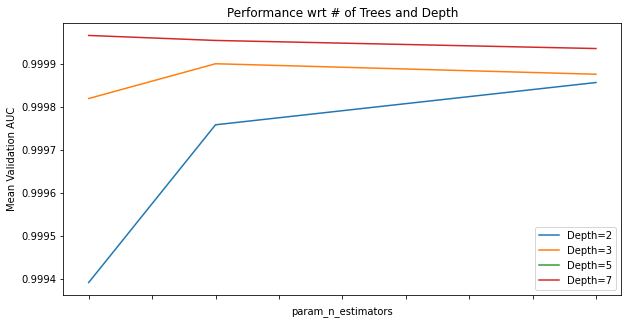

In [94]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.02 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

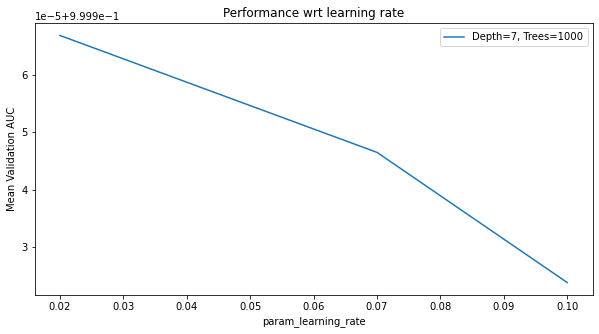

In [43]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.02 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==1000) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=7, Trees=1000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [44]:
#we put best params after cross validation and fit in again in model
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=7,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.96268	validation_1-auc:0.95264
[1]	validation_0-auc:0.97677	validation_1-auc:0.96746
[2]	validation_0-auc:0.98153	validation_1-auc:0.97008
[3]	validation_0-auc:0.98385	validation_1-auc:0.97264
[4]	validation_0-auc:0.99587	validation_1-auc:0.99126
[5]	validation_0-auc:0.99823	validation_1-auc:0.99552
[6]	validation_0-auc:0.99936	validation_1-auc:0.99771
[7]	validation_0-auc:0.99944	validation_1-auc:0.99808
[8]	validation_0-auc:0.99936	validation_1-auc:0.99767
[9]	validation_0-auc:0.99954	validation_1-auc:0.99811
[10]	validation_0-auc:0.99954	validation_1-auc:0.99815
[11]	validation_0-auc:0.99956	validation_1-auc:0.99815
[12]	validation_0-auc:0.99959	validation_1-auc:0.99801
[13]	validation_0-auc:0.99972	validation_1-auc:0.99832
[14]	validation_0-auc:0.99975	validation_1-auc:0.99833
[15]	validation_0-auc:0.99978	validation_1-auc:0.99838
[16]	validation_0-auc:0.99979	validation_1-auc:0.99835
[17]	validation_0-auc:0.99988	validation_1-auc:0.99891
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
#showing value of predict with new params
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 1.0000
AUC Valid: 0.9998


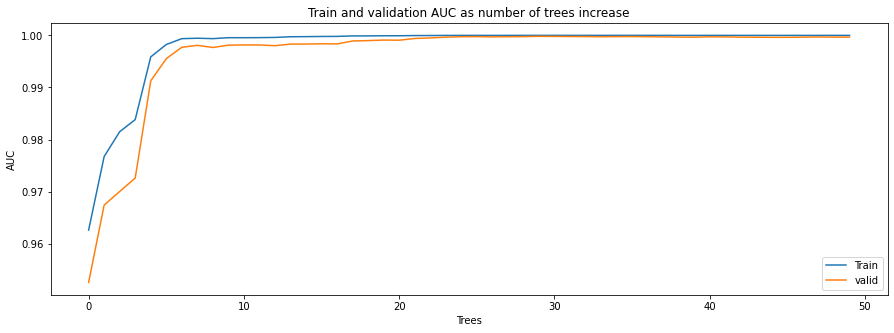

In [46]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [47]:
#find the feature importance of this model
df_var_imp = pd.DataFrame({"Variable": var_colums,
                           "Importance": model_xgboost_fin.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Variable,Importance
54,+/-_max,0.209515
125,+/-_max_opp,0.132518
21,efg%,0.045294
32,ortg,0.040750
68,drtg_max,0.035115
139,drtg_max_opp,0.030835
140,total_opp,0.028106
89,pts_opp,0.025283
104,drtg_opp,0.024512
103,ortg_opp,0.022809
